### 🔧 环境配置和检查

#### 概述

本教程需要特定的环境配置以确保最佳学习体验。以下配置将帮助您：

- 使用统一的conda环境：激活统一的学习环境
- 通过国内镜像源快速安装依赖：配置pip使用清华镜像源
- 加速模型下载：设置HuggingFace镜像Agent
- 检查系统配置：检查硬件和软件配置

#### 配置

- **所需环境及其依赖已经部署好**
- 在`Notebook`右上角选择`jupyter内核`为`python(flyai_agent_in_action)`，即可执行下方代码

In [1]:
%%script bash

# 1. 激活 conda 环境 (仅对当前单元格有效)
eval "$(conda shell.bash hook)"
conda activate flyai_agent_in_action

echo "========================================="
echo "== Conda 环境检查报告 (仅针对当前 Bash 子进程) =="
echo "========================================="

# 2. 检查当前激活的环境
CURRENT_ENV_NAME=$(basename $CONDA_PREFIX)

if [ "$CURRENT_ENV_NAME" = "flyai_agent_in_action" ]; then
    echo "✅ 当前单元格已成功激活到 flyai_agent_in_action 环境。"
    echo "✅ 正在使用的环境路径: $CONDA_PREFIX"
    echo ""
    echo "💡 提示: 后续的 Python 单元格将使用 Notebook 当前选择的 Jupyter 内核。"
    echo "   如果需要后续单元格也使用此环境，请执行以下操作:"
    echo "   1. 检查 Notebook 右上角是否已选择 'python(flyai_agent_in_action)'。"
else
    echo "❌ 激活失败或环境名称不匹配。当前环境: $CURRENT_ENV_NAME"
    echo ""
    echo "⚠️ 严重提示: 建议将 Notebook 的 Jupyter **内核 (Kernel)** 切换为 'python(flyai_agent_in_action)'。"
    echo "   (通常位于 Notebook 右上角或 '内核' 菜单中)"
    echo ""
    echo "📚 备用方法 (不推荐): 如果无法切换内核，则必须在**每个**代码单元格的头部重复以下命令:"
    echo ""
    echo "%%script bash"
    echo "# 必须在每个单元格都执行"
    echo "eval \"\$(conda shell.bash hook)\""
    echo "conda activate flyai_agent_in_action"
fi

echo "=========================================" 

== Conda 环境检查报告 (仅针对当前 Bash 子进程) ==
✅ 当前单元格已成功激活到 flyai_agent_in_action 环境。
✅ 正在使用的环境路径: /workspace/envs/flyai_agent_in_action

💡 提示: 后续的 Python 单元格将使用 Notebook 当前选择的 Jupyter 内核。
   如果需要后续单元格也使用此环境，请执行以下操作:
   1. 检查 Notebook 右上角是否已选择 'python(flyai_agent_in_action)'。


In [2]:
# 2. 设置pip 为清华源
%pip config set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple
%pip config list


Writing to /root/.config/pip/pip.conf
Note: you may need to restart the kernel to use updated packages.
global.index-url='https://pypi.tuna.tsinghua.edu.cn/simple'
:env:.target=''
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 3. 设置HuggingFaceAgent
%env HF_ENDPOINT=https://hf-mirror.com
# 验证：使用shell命令检查
!echo $HF_ENDPOINT

env: HF_ENDPOINT=https://hf-mirror.com
https://hf-mirror.com


In [4]:
# 🔍 环境信息检查脚本
#
# 本脚本的作用：
# 1. 安装 pandas 库用于数据表格展示
# 2. 检查系统的各项配置信息
# 3. 生成详细的环境报告表格
#
# 对于初学者来说，这个步骤帮助您：
# - 了解当前运行环境的硬件配置
# - 确认是否满足模型运行的最低要求
# - 学习如何通过代码获取系统信息

# 安装 pandas 库 - 用于创建和展示数据表格
# pandas 是 Python 中最流行的数据处理和分析库
%pip install pandas==2.2.2 tabulate==0.9.0

import platform # 导入 platform 模块以获取系统信息
import os # 导入 os 模块以与操作系统交互
import subprocess # 导入 subprocess 模块以运行外部命令
import pandas as pd # 导入 pandas 模块，通常用于数据处理，这里用于创建表格
import shutil # 导入 shutil 模块以获取磁盘空间信息

# 获取 CPU 信息的函数，包括核心数量
def get_cpu_info():
    cpu_info = "" # 初始化 CPU 信息字符串
    physical_cores = "N/A"
    logical_cores = "N/A"

    if platform.system() == "Windows": # 如果是 Windows 系统
        cpu_info = platform.processor() # 使用 platform.processor() 获取 CPU 信息
        try:
            # 获取 Windows 上的核心数量 (需要 WMI)
            import wmi
            c = wmi.WMI()
            for proc in c.Win32_Processor():
                physical_cores = proc.NumberOfCores
                logical_cores = proc.NumberOfLogicalProcessors
        except:
            pass # 如果 WMI 不可用，忽略错误

    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取 CPU 信息和核心数量
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin' # 更新 PATH 环境变量
        try:
            process_brand = subprocess.Popen(['sysctl', "machdep.cpu.brand_string"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_brand, stderr_brand = process_brand.communicate()
            cpu_info = stdout_brand.decode().split(': ')[1].strip() if stdout_brand else "Could not retrieve CPU info"

            process_physical = subprocess.Popen(['sysctl', "hw.physicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_physical, stderr_physical = process_physical.communicate()
            physical_cores = stdout_physical.decode().split(': ')[1].strip() if stdout_physical else "N/A"

            process_logical = subprocess.Popen(['sysctl', "hw.logicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_logical, stderr_logical = process_logical.communicate()
            logical_cores = stdout_logical.decode().split(': ')[1].strip() if stdout_logical else "N/A"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/cpuinfo 文件获取 CPU 信息和核心数量
            with open('/proc/cpuinfo') as f:
                physical_cores_count = 0
                logical_cores_count = 0
                cpu_info_lines = []
                for line in f:
                    if line.startswith('model name'): # 查找以 'model name'开头的行
                        if not cpu_info: # 只获取第一个 model name
                            cpu_info = line.split(': ')[1].strip()
                    elif line.startswith('cpu cores'): # 查找以 'cpu cores' 开头的行
                        physical_cores_count = int(line.split(': ')[1].strip())
                    elif line.startswith('processor'): # 查找以 'processor' 开头的行
                        logical_cores_count += 1
                physical_cores = str(physical_cores_count) if physical_cores_count > 0 else "N/A"
                logical_cores = str(logical_cores_count) if logical_cores_count > 0 else "N/A"
                if not cpu_info:
                     cpu_info = "Could not retrieve CPU info"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    return f"{cpu_info} ({physical_cores} physical cores, {logical_cores} logical cores)" # 返回 CPU 信息和核心数量


# 获取内存信息的函数
def get_memory_info():
    mem_info = "" # 初始化内存信息字符串
    if platform.system() == "Windows":
        # 在 Windows 上不容易通过标准库获取，需要外部库或 PowerShell
        mem_info = "Requires external tools on Windows" # 设置提示信息
    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取内存大小
        process = subprocess.Popen(['sysctl', "hw.memsize"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) # 运行 sysctl 命令
        stdout, stderr = process.communicate() # 获取标准输出和标准错误
        mem_bytes = int(stdout.decode().split(': ')[1].strip()) # 解析输出，获取内存大小（字节）
        mem_gb = mem_bytes / (1024**3) # 转换为 GB
        mem_info = f"{mem_gb:.2f} GB" # 格式化输出
    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/meminfo 文件获取内存信息
            with open('/proc/meminfo') as f:
                total_mem_kb = 0
                available_mem_kb = 0
                for line in f:
                    if line.startswith('MemTotal'): # 查找以 'MemTotal' 开头的行
                        total_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取总内存（KB）
                    elif line.startswith('MemAvailable'): # 查找以 'MemAvailable' 开头的行
                         available_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取可用内存（KB）

                if total_mem_kb > 0:
                    total_mem_gb = total_mem_kb / (1024**2) # 转换为 GB
                    mem_info = f"{total_mem_gb:.2f} GB" # 格式化输出总内存
                    if available_mem_kb > 0:
                        available_mem_gb = available_mem_kb / (1024**2)
                        mem_info += f" (Available: {available_mem_gb:.2f} GB)" # 添加可用内存信息
                else:
                     mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息

        except:
            mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息
    return mem_info # 返回内存信息

# 获取 GPU 信息的函数，包括显存
def get_gpu_info():
    try:
        # 尝试使用 nvidia-smi 获取 NVIDIA GPU 信息和显存
        result = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total', '--format=csv,noheader'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            gpu_lines = result.stdout.strip().split('\n') # 解析输出，获取 GPU 名称和显存
            gpu_info_list = []
            for line in gpu_lines:
                name, memory = line.split(', ')
                gpu_info_list.append(f"{name} ({memory})") # 格式化 GPU 信息
            return ", ".join(gpu_info_list) if gpu_info_list else "NVIDIA GPU found, but info not listed" # 返回 GPU 信息或提示信息
        else:
             # 尝试使用 lshw 获取其他 GPU 信息 (需要安装 lshw)
            try:
                result_lshw = subprocess.run(['lshw', '-C', 'display'], capture_output=True, text=True)
                if result_lshw.returncode == 0: # 如果命令成功执行
                     # 简单解析输出中的 product 名称和显存
                    gpu_info_lines = []
                    current_gpu = {}
                    for line in result_lshw.stdout.splitlines():
                        if 'product:' in line:
                             if current_gpu:
                                 gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")
                             current_gpu = {'product': line.split('product:')[1].strip()}
                        elif 'size:' in line and 'memory' in line:
                             current_gpu['memory'] = line.split('size:')[1].strip()

                    if current_gpu: # 添加最后一个 GPU 的信息
                        gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")

                    return ", ".join(gpu_info_lines) if gpu_info_lines else "GPU found (via lshw), but info not parsed" # 如果找到 GPU 但信息无法解析，设置提示信息
                else:
                    return "No GPU found (checked nvidia-smi and lshw)" # 如果两个命令都找不到 GPU，设置提示信息
            except FileNotFoundError:
                 return "No GPU found (checked nvidia-smi, lshw not found)" # 如果找不到 lshw 命令，设置提示信息
    except FileNotFoundError:
        return "No GPU found (nvidia-smi not found)" # 如果找不到 nvidia-smi 命令，设置提示信息


# 获取 CUDA 版本的函数
def get_cuda_version():
    try:
        # 尝试使用 nvcc --version 获取 CUDA 版本
        result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            for line in result.stdout.splitlines():
                if 'release' in line: # 查找包含 'release' 的行
                    return line.split('release ')[1].split(',')[0] # 解析行，提取版本号
        return "CUDA not found or version not parsed" # 如果找不到 CUDA 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "CUDA not found" # 如果找不到 nvcc 命令，设置提示信息

# 获取 Python 版本的函数
def get_python_version():
    return platform.python_version() # 获取 Python 版本

# 获取 Conda 版本的函数
def get_conda_version():
    try:
        # 尝试使用 conda --version 获取 Conda 版本
        result = subprocess.run(['conda', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            return result.stdout.strip() # 返回 Conda 版本
        return "Conda not found or version not parsed" # 如果找不到 Conda 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "Conda not found" # 如果找不到 conda 命令，设置提示信息

# 获取物理磁盘空间信息的函数
def get_disk_space():
    try:
        total, used, free = shutil.disk_usage("/") # 获取根目录的磁盘使用情况
        total_gb = total / (1024**3) # 转换为 GB
        used_gb = used / (1024**3) # 转换为 GB
        free_gb = free / (1024**3) # 转换为 GB
        return f"Total: {total_gb:.2f} GB, Used: {used_gb:.2f} GB, Free: {free_gb:.2f} GB" # 格式化输出
    except Exception as e:
        return f"Could not retrieve disk info: {e}" # 如果获取信息出错，设置错误信息

# 获取环境信息
os_name = platform.system() # 获取操作系统名称
os_version = platform.release() # 获取操作系统版本
if os_name == "Linux":
    try:
        # 在 Linux 上尝试获取发行版和版本
        lsb_info = subprocess.run(['lsb_release', '-a'], capture_output=True, text=True)
        if lsb_info.returncode == 0: # 如果命令成功执行
            for line in lsb_info.stdout.splitlines():
                if 'Description:' in line: # 查找包含 'Description:' 的行
                    os_version = line.split('Description:')[1].strip() # 提取描述信息作为版本
                    break # 找到后退出循环
                elif 'Release:' in line: # 查找包含 'Release:' 的行
                     os_version = line.split('Release:')[1].strip() # 提取版本号
                     # 尝试获取 codename
                     try:
                         codename_info = subprocess.run(['lsb_release', '-c'], capture_output=True, text=True)
                         if codename_info.returncode == 0:
                             os_version += f" ({codename_info.stdout.split(':')[1].strip()})" # 将 codename 添加到版本信息中
                     except:
                         pass # 如果获取 codename 失败则忽略

    except FileNotFoundError:
        pass # lsb_release 可能未安装，忽略错误

full_os_info = f"{os_name} {os_version}" # 组合完整的操作系统信息
cpu_info = get_cpu_info() # 调用函数获取 CPU 信息和核心数量
memory_info = get_memory_info() # 调用函数获取内存信息
gpu_info = get_gpu_info() # 调用函数获取 GPU 信息和显存
cuda_version = get_cuda_version() # 调用函数获取 CUDA 版本
python_version = get_python_version() # 调用函数获取 Python 版本
conda_version = get_conda_version() # 调用函数获取 Conda 版本
disk_info = get_disk_space() # 调用函数获取物理磁盘空间信息


# 创建用于存储数据的字典
env_data = {
    "项目": [ # 项目名称列表
        "操作系统",
        "CPU 信息",
        "内存信息",
        "GPU 信息",
        "CUDA 信息",
        "Python 版本",
        "Conda 版本",
        "物理磁盘空间" # 添加物理磁盘空间
    ],
    "信息": [ # 对应的信息列表
        full_os_info,
        cpu_info,
        memory_info,
        gpu_info,
        cuda_version,
        python_version,
        conda_version,
        disk_info # 添加物理磁盘空间信息
    ]
}

# 创建一个 pandas DataFrame
df = pd.DataFrame(env_data)

# 打印表格
print("### 环境信息") # 打印标题
print(df.to_markdown(index=False)) # 将 DataFrame 转换为 Markdown 格式并打印，不包含索引


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
### 环境信息
| 项目         | 信息                                                                  |
|:-------------|:----------------------------------------------------------------------|
| 操作系统     | Linux 5.15.0-126-generic                                              |
| CPU 信息     | Intel(R) Xeon(R) Platinum 8468 (48 physical cores, 192 logical cores) |
| 内存信息     | 2015.36 GB (Available: 1867.89 GB)                                    |
| GPU 信息     | No GPU found (checked nvidia-smi, lshw not found)                     |
| CUDA 信息    | 12.6                                                                  |
| Python 版本  | 3.12.11                                                               |
| Conda 版本   | conda 25.7.0                                                          |
| 物理磁盘空间 | Total: 2014.78 GB, Used: 788.88 GB, Free: 1123.48 GB                  |


## 时间旅行（Time travel）

### 回顾

我们讨论了“人机协作（Human-in-the-loop）”的动机：

(1) 许可（Approval）——可以中断Agent（agent）执行，把当前状态展示给用户，并等待用户批准某个动作。

(2) 调试（Debugging）——可以倒回到过去的图状态，重放以复现或规避问题。

(3) 编辑（Editing）——可以直接修改图的状态。

我们展示了如何使用断点（breakpoints）在特定节点暂停图，或让图在运行时按条件动态中断。

随后，我们演示了如何在获得人类批准后继续，或者直接基于人类反馈修改图状态。

### 目标

下面将展示 **LangGraph 如何通过“查看历史、回放、从历史状态分叉”来支持调试**（参考文档：`https://langchain-ai.github.io/langgraph/how-tos/human_in_the_loop/time-travel/`）。

这套能力称为“时间旅行（time travel）”。

---
LangGraph 中的 **“时光旅行（Time travel）”** 是一个调试功能，允许你检查和分析图（graph）中每个步骤的状态。这个功能非常有用，因为它能让你像回放电影一样，逐帧查看图的执行过程，从而更好地理解：

* **图的执行流程**：了解数据和状态如何在节点之间传递。
* **状态的变化**：精确地看到每个节点执行后，图的全局状态是如何更新的。
* **调试问题**：当某个节点出现意外行为或图进入错误状态时，你可以追溯到导致问题的具体步骤。

简而言之，它让你能够 **“穿越” 回去**，查看任何一个特定时间点（即任何一个节点执行完毕后）的完整状态快照。

In [5]:
%pip install --quiet langgraph==0.6.7 langchain_openai==0.3.32  langgraph_sdk==0.2.6 langgraph-prebuilt==0.6.4

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# 设置 OpenAI API 密钥
# 这是使用 OpenAI 模型所必需的
_set_env("OPENAI_API_KEY")
# 设置 OpenAI APIAgent地址 (例如：https://api.apiyi.com/v1）
_set_env("OPENAI_BASE_URL")

OPENAI_API_KEY:  ········
OPENAI_BASE_URL:  ········


我们先构建一个最小可用的“计算助手”Agent（agent），它可以调用我们注册的算术工具函数。

In [7]:
from langchain_openai import ChatOpenAI


def multiply(a: int, b: int) -> int:
    """将两个整数相乘并返回结果。

    参数:
        a: 第一个整数
        b: 第二个整数
    返回:
        两数相乘的整数结果
    """
    return a * b


# 声明一个可被大模型调用的“工具”函数（函数签名即工具规范）
def add(a: int, b: int) -> int:
    """将两个整数相加并返回结果。

    参数:
        a: 第一个整数
        b: 第二个整数
    返回:
        两数相加的整数结果
    """
    return a + b


def divide(a: int, b: int) -> float:
    """将整数 a 除以整数 b 并返回浮点结果。

    参数:
        a: 被除数（整数）
        b: 除数（整数，注意不能为 0）
    返回:
        相除得到的浮点数结果
    """
    return a / b


# 向图中注册的工具列表（大模型可通过函数调用协议使用）
tools = [add, multiply, divide]

# 初始化聊天模型；这里使用 OpenAI 的 gpt-4o
llm = ChatOpenAI(model="gpt-4o")

# 绑定工具，使得模型可以通过“工具调用（function calling）”调用上面的 Python 函数
llm_with_tools = llm.bind_tools(tools)

图可视化：


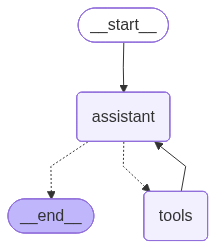

✅ 图渲染成功！


In [8]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# 系统提示词：限定助手的角色与任务，保证输出聚焦在算术计算
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# 定义“助手”节点：
# - 输入：MessagesState（包含当前对话消息列表）
# - 行为：将系统消息 + 历史消息传入大模型（已绑定工具），得到新的 AI 消息
# - 输出：追加一条 AI 消息到消息状态

def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"]) ]}

# 构建图（StateGraph）：声明状态类型为 MessagesState（内置消息归约器，按消息 ID 可覆盖/追加）
builder = StateGraph(MessagesState)

# 定义节点（工作单元）：
# - assistant：由大模型生成回复或工具调用
# - tools：当触发工具调用时，由 ToolNode 执行对应的 Python 函数
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# 定义边（控制流）：
# 1) 从 START 进入 assistant
builder.add_edge(START, "assistant")
# 2) 条件边：若 assistant 最新消息包含工具调用 -> 流转到 tools；否则 -> 流程结束
builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
# 3) 工具执行后回到 assistant，让模型基于工具结果继续对话或结束
builder.add_edge("tools", "assistant")

# 启用内存检查点（MemorySaver）：用于记录每一步状态，以支持“时间旅行”（回放/分叉）
memory = MemorySaver()
graph = builder.compile(checkpointer=MemorySaver())

# 可视化图结构（xray=True 展示节点与条件流转），便于理解整体流程
# 展示图结构
# 图可视化
print("图可视化：")

# 方案1：尝试使用 Pyppeteer 本地渲染（推荐）
try:
    # 可视化：通过 Mermaid 渲染图结构
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
    print("✅ 图渲染成功！")
except Exception as e:
    print(f"❌ Pyppeteer 渲染失败: {e}")
    
    # 方案2：显示 Mermaid 文本格式
    print("\n📝 图结构（Mermaid 文本格式）：")
    print("=" * 50)
    mermaid_text = graph.get_graph().draw_mermaid()
    print(mermaid_text)
    print("=" * 50)
    
    # 方案3：显示图的节点和边信息
    print("\n🔗 图结构信息：")
    print("节点:", list(graph.get_graph().nodes.keys()))
    print("边:", list(graph.get_graph().edges))
    
    # 方案4：提供手动渲染说明
    print("\n💡 手动渲染说明：")
    print("1. 复制上面的 Mermaid 文本")
    print("2. 访问 https://mermaid.live/")
    print("3. 粘贴文本到编辑器中查看图形")
    print("4. 或者使用支持 Mermaid 的 Markdown 编辑器")

像前面一样，我们来运行一次完整流程。

In [9]:
# 运行一次：将人类输入注入消息状态，并按节点顺序流式执行
# stream_mode="values" 表示每个节点执行后输出完整状态（便于学习/调试）

# 输入消息
initial_input = {"messages": HumanMessage(content="Multiply 2 and 3")}

# 线程配置（thread_id 用于标识一次会话轨迹，支持时间旅行）
thread = {"configurable": {"thread_id": "1"}}

# 执行图：依次运行 assistant ->（若触发工具）tools -> assistant ... 直到结束
for event in graph.stream(initial_input, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_W3zlacF4oEyGDkkoiv2QAtpZ)
 Call ID: call_W3zlacF4oEyGDkkoiv2QAtpZ
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================== Ai Message ==================================

The result of multiplying 2 and 3 is 6.


## 浏览历史

给定 `thread_id`，我们可以使用 `get_state` 查看图的“当前”状态！

In [10]:
# 查看当前线程的最新状态快照（包含 values/next/config/metadata 等）
graph.get_state({'configurable': {'thread_id': '1'}})

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_W3zlacF4oEyGDkkoiv2QAtpZ', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply', 'parameters': None}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 217, 'total_tokens': 235, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}, 'input_tokens': 0, 'output_tokens': 0, 'input_tokens_details': None}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_5d7ee1b844', 'id': 'chatcmpl-CMlHS3SiOGlOJYpj9djJwyTNzkPQf', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--44baeafe-3c8c-438a-acea-bdbd89e1c9f3-0', tool_

我们也可以浏览Agent的“状态历史”。

`get_state_history` 可以让我们获取先前每一步的状态记录。


In [11]:
# 获取线程的“状态历史”（从最近到最早）。用于回放与分叉。
all_states = [s for s in graph.get_state_history(thread)]

In [12]:
len(all_states)

5

In [28]:
all_states

[StateSnapshot(values={'messages': [HumanMessage(content='Multiply 5 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a0c0b-6e54-6c1b-8001-3402a5df76f3'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-10-04T01:23:21.113077+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a0c0b-4a7c-6dcd-8000-992ba4966deb'}}, tasks=(PregelTask(id='45abab41-d611-f33c-213d-b84fb28d4152', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fQpqIYqauvUSZQEXTpALIPFo', 'functi

`all_states` 是一个 **Python 列表**，它包含了一系列 **`StateSnapshot`** 对象。这通常是 **LangChain/LangGraph** 框架中 **检查点 (Checkpointer)** 的输出，用于记录工作流中每一步的状态历史。

为了清晰地展示这些复杂对象中的关键信息，对列表中的每一个 `StateSnapshot` 进行格式化，突出显示 **步骤 (step)**、**消息 (`messages`)** 和 **下一步 (`next`)**。

-----

#### 格式化后的 `all_states` 状态历史

该列表按时间**倒序**排列（最新的快照在最前面，`step` 值最大，`created_at` 最晚）。

| 步骤 (step) | 创建时间 (created\_at) | 流程状态 (`next`) | 关键 `messages` (对话内容) |
| :---: | :--- | :--- | :--- |
| **1** | `2025-10-04T01:23:21.113077+00:00` | `('assistant',)` | **Human:** 'Multiply 5 and 3' |
| **3** | `2025-10-04T01:23:21.089276+00:00` | `()` (End) | **Human:** 'Multiply 2 and 3' <br>**AI (Tool Call):** multiply(2, 3) <br>**Tool Output:** '6' <br>**AI (Final):** 'The result of multiplying 2 and 3 is 6.' |
| **2** | `2025-10-04T01:23:20.423426+00:00` | `('assistant',)` | **Human:** 'Multiply 2 and 3' <br>**AI (Tool Call):** multiply(2, 3) <br>**Tool Output:** '6' |
| **1** | `2025-10-04T01:23:20.421858+00:00` | `('tools',)` | **Human:** 'Multiply 2 and 3' <br>**AI (Tool Call):** multiply(2, 3) |
| **3** | `2025-10-04T01:23:19.612568+00:00` | `()` (End) | **Human:** 'Multiply 2 and 3' <br>**AI (Tool Call):** multiply(2, 3) <br>**Tool Output:** '6' <br>**AI (Final):** 'The result of multiplying 2 and 3 is 6.' |
| **2** | `2025-10-04T01:23:18.646382+00:00` | `('assistant',)` | **Human:** 'Multiply 2 and 3' <br>**AI (Tool Call):** multiply(2, 3) <br>**Tool Output:** '6' |
| **1** | `2025-10-04T01:23:18.644472+00:00` | `('tools',)` | **Human:** 'Multiply 2 and 3' <br>**AI (Tool Call):** multiply(2, 3) |
| **0** | `2025-10-04T01:23:17.354635+00:00` | `('assistant',)` | **Human:** 'Multiply 2 and 3' |
| **-1** | `2025-10-04T01:23:17.353894+00:00` | `('__start__',)` | **messages:** `[]` (初始空状态) |

-----

#### 观察到的工作流模式

从状态快照中可以看出，LangGraph 在处理一个带工具调用的请求时，通常遵循以下循环模式：

1.  **Step 0 (`__start__`)**: 接收到 **`HumanMessage`** (例如: 'Multiply 2 and 3')。
2.  **Step 1 (`assistant` -\> `tools`)**: **AI** 收到用户消息后，决定调用一个工具（如 `multiply(2, 3)`），并返回一个包含 `tool_calls` 的 **`AIMessage`**。
3.  **Step 2 (`tools` -\> `assistant`)**: **Tools** 节点执行工具，返回包含结果 (如 **`6`**) 的 **`ToolMessage`**。
4.  **Step 3 (`assistant` -\> `()`)**: **AI** 收到工具结果，生成最终的自然语言回复 (如 'The result... is 6.')，并以空 `next` 元组表示 **结束** 流程。

**注意**：

  * **`step 1` 和 `step 3` 的重复出现**：在列表开头，有两个不同的操作流程被记录。
      * 最新的一个（`step 1`, `next=('assistant',)`）可能代表一个**新的、未完成**的请求：**'Multiply 5 and 3'**。
      * 其他完整的流程都是针对 **'Multiply 2 and 3'** 的，其中 `step 3` 是最终完成状态。
  * **重复的流程**：针对 'Multiply 2 and 3' 有多组完整的 `step 0, 1, 2, 3` 流程，这可能是在演示或测试环境中多次运行相同输入的结果。

列表的第一个元素就是当前状态，与 `get_state` 的结果一致。

In [13]:
all_states[-2]

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a0c0b-4a7c-6dcd-8000-992ba4966deb'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-10-04T01:23:17.354635+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a0c0b-4a7b-60ce-bfff-a754d992bfd1'}}, tasks=(PregelTask(id='b0016181-18e9-5106-fd2b-2fb0aa61ba3f', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result={'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_W3zlacF4oEyGDkkoiv2QAtpZ', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply', 'parameters': None}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'p

上面的流程也可以如下图所示可视化：

![fig1.jpg](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbb038211b544898570be3_time-travel1.png)

## 回放（Replaying）

我们可以从任意一个历史步骤重新运行Agent。

![fig2.jpg](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbb038a0bd34b541c78fb8_time-travel2.png)

我们回到“接收人类输入”的那一步来观察与回放。

In [14]:
to_replay = all_states[-2]

In [15]:
to_replay

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a0c0b-4a7c-6dcd-8000-992ba4966deb'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-10-04T01:23:17.354635+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a0c0b-4a7b-60ce-bfff-a754d992bfd1'}}, tasks=(PregelTask(id='b0016181-18e9-5106-fd2b-2fb0aa61ba3f', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result={'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_W3zlacF4oEyGDkkoiv2QAtpZ', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply', 'parameters': None}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'p

查看该检查点的状态。

In [16]:
to_replay.values

{'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5')]}

我们还能看到接下来要调用的节点（`next`）。

In [17]:
to_replay.next

('assistant',)

我们也能拿到该检查点的 `config`，其中包含 `checkpoint_id` 与 `thread_id`。

In [18]:
to_replay.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a0c0b-4a7c-6dcd-8000-992ba4966deb'}}

要从这里回放，只需把该 `config` 传回给Agent即可！

图会识别此检查点之前已执行过，因此会从该检查点开始“重放”其后的节点。

In [19]:
for event in graph.stream(None, to_replay.config, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_fQpqIYqauvUSZQEXTpALIPFo)
 Call ID: call_fQpqIYqauvUSZQEXTpALIPFo
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================== Ai Message ==================================

The result of multiplying 2 and 3 is 6.


现在，我们可以查看回放后当前线程的最新状态。

## 分叉（Forking）

如果我们想从同一个历史步骤“重新开始”，但换一个不同的输入，这就是“分叉”。

![fig3.jpg](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbb038f89f2d847ee5c336_time-travel3.png)

In [20]:
to_fork = all_states[-2]
to_fork.values["messages"]

[HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5')]

同样，我们也能拿到该步骤对应的 `config`。

In [21]:
to_fork.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a0c0b-4a7c-6dcd-8000-992ba4966deb'}}

我们来在这个检查点上修改状态。

只需调用 `update_state` 并提供 `checkpoint_id`。

回顾 `messages` 归约器的规则：

- 默认是追加；除非显式提供“消息 ID”。
- 若提供相同“消息 ID”，则对该消息进行覆盖而不是追加。

因此要覆盖该条人类消息，只需提供其原始 `id`（可通过 `to_fork.values["messages"][0].id` 获取）。

In [22]:
fork_config = graph.update_state(
    to_fork.config,
    {"messages": [HumanMessage(content='Multiply 5 and 3',
                               id=to_fork.values["messages"][0].id)]},
)

In [23]:
fork_config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a0c0b-6e54-6c1b-8001-3402a5df76f3'}}

这会创建一个新的“分叉”检查点。

注意：元数据（例如下一步将流转到哪个节点）会被保留！

当前线程的最新状态已被更新为分叉后的输入。

In [24]:
all_states = [state for state in graph.get_state_history(thread) ]
all_states[0].values["messages"]

[HumanMessage(content='Multiply 5 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5')]

In [25]:
graph.get_state({'configurable': {'thread_id': '1'}})

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 5 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a0c0b-6e54-6c1b-8001-3402a5df76f3'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-10-04T01:23:21.113077+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a0c0b-4a7c-6dcd-8000-992ba4966deb'}}, tasks=(PregelTask(id='45abab41-d611-f33c-213d-b84fb28d4152', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result=None),), interrupts=())

接下来流式运行时，图会识别该检查点“尚未执行过后续节点”。

因此将“真正运行”后续节点，而不是简单回放。

In [26]:
for event in graph.stream(None, fork_config, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 5 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_e0npcQyeMW8evdDixBYFvaJf)
 Call ID: call_e0npcQyeMW8evdDixBYFvaJf
  Args:
    a: 5
    b: 3
================================= Tool Message =================================
Name: multiply

15
================================== Ai Message ==================================

The result of multiplying 5 and 3 is 15.


现在可以看到，当前状态已处于本次运行的终点。

In [27]:
graph.get_state({'configurable': {'thread_id': '1'}})

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 5 and 3', additional_kwargs={}, response_metadata={}, id='59609b0a-aa2c-4c7c-8ea3-b43b013b23a5'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_e0npcQyeMW8evdDixBYFvaJf', 'function': {'arguments': '{"a":5,"b":3}', 'name': 'multiply', 'parameters': None}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 217, 'total_tokens': 235, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}, 'input_tokens': 0, 'output_tokens': 0, 'input_tokens_details': None}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_5d7ee1b844', 'id': 'chatcmpl-CMlHVLOu7vGDYaqjo3V2095kv1Ys5', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--92e9279c-750a-45d9-b3fa-537397f6093f-0', tool_